In [1]:
import requests
import time
import os

#CLOUD
# from google.colab import drive
# drive.mount('/content/drive')
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

#WEB SCRAPING
import requests
import urllib.request
import time
from urllib3.exceptions import InsecureRequestWarning
!pip install investpy
import investpy
import warnings
warnings.filterwarnings('ignore')
# !pip install tradingeconomics
# import tradingeconomics as te
# te.login('Your_Key:Your_Secret')
# te.login()

#from bs4 import BeautifulSoup

#MANIPULACION DE DATOS
import pandas as pd #Data frame para manipulación de datos
from pandas import datetime
import datetime #Para fechar registros de acuerdo a su indice

#ANALISIS MULTIVARIANTE
import numpy as np #Paquete con algebra lineal
import scipy as sc #Paquete con calculo vectorial

#GRAFICOS
import matplotlib.pyplot as plt #para elaboración de graficos simples
from pandas.plotting import autocorrelation_plot #Para
from pandas.plotting import register_matplotlib_converters
from statsmodels.sandbox.regression.predstd import wls_prediction_std
register_matplotlib_converters()
import seaborn as sns #para elaboración de graficos mapas de calor
sns.set()

#MACHINE LEARNING
import sklearn as sk #

import statsmodels.api as sm #Modelos estadistico y metodologías econometricas
from statsmodels.tsa.stattools import adfuller #Pruebas de raíz unitaria ads,kpss,ers
from statsmodels.tsa.seasonal import seasonal_decompose #Análisis de estacionalidad
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns


In [2]:
#FECHADO
inicio_tiempo = datetime.datetime.now()
hoy1= datetime.datetime.today()
hoy2=hoy1.strftime('%d/%m/%Y')
hoy3=str(hoy2)
# hoy3='02/04/2020'

print(hoy3)

Inicio1='02/01/2006'
#Fin1='01/01/2020'

03/09/2020


#Prueba Consolidado

In [3]:
# countries=investpy.bonds.get_bond_countries()
# df_bond= pd.DataFrame()
# for i in countries:
#   list_bonds_total=investpy.bonds.get_bonds_list(country=i) 
#   for j in list_bonds_total:
#     df_bonds_total=investpy.get_bond_historical_data(bond= j, from_date=Inicio1, to_date=hoy3)   #La cosa es el from_date 
#     df_bonds_total=df_bonds_total.assign(Variable=lambda x: j, Type=lambda x: "bond")
#     df_bonds_total.reset_index(inplace=True)
#     df_date2 = df_date.join(df_bonds_total.set_index('Date'), on='Date') #El df_date comienza desde este año
#     df_date2 = df_date2.fillna(method='ffill') 
#     df_bond = pd.concat([df_bond, df_date2]) #Se concatenan los df
# print(df_bond)

In [4]:
# df_bond.isnull().sum().sum()

In [5]:
# df_bond.to_csv('/content/drive/My Drive/01. Business Intelligence & Analytics (BI&A)/Market Reporting/1. Insumos/DB_Bond_Market_Reporting.csv') #data.csv

####PRUEBA BONOS USA

In [6]:
year_2020= pd.date_range(start="2020-01-01", end=datetime.datetime.today())
df_date = pd.DataFrame(year_2020, columns=['Date'])
print(df_date)

          Date
0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
4   2020-01-05
..         ...
242 2020-08-30
243 2020-08-31
244 2020-09-01
245 2020-09-02
246 2020-09-03

[247 rows x 1 columns]


In [7]:
usa_list_bonds=investpy.bonds.get_bonds_list(country='United States') 
df_usa_bond= pd.DataFrame()
for j in usa_list_bonds:
  df_usa=investpy.get_bond_historical_data(bond= j, from_date=Inicio1, to_date=hoy3)
  df_usa=df_usa.assign(Variable=lambda x: j, Type=lambda x: "bond" , Types=lambda x: "bonds") #Se añaden columnas Variable y Type
  df_usa.reset_index(inplace=True)
  df_date1 = df_date.join(df_usa.set_index('Date'), on='Date')
  df_date1 = df_date1.fillna(method='ffill') ##########
  df_date1=df_date1.set_index('Date')
  df_usa_shift=df_date1.shift(90)
  df_usa_junto = pd.merge(df_usa_shift, df_date1, on='Date' )
  df_usa_bond = pd.concat([df_usa_bond, df_usa_junto]) 
print(df_usa_bond)

            Open_x  High_x  Low_x  Close_x Variable_x Type_x Types_x  Open_y  \
Date                                                                           
2020-01-01     NaN     NaN    NaN      NaN        NaN    NaN     NaN   2.389   
2020-01-02     NaN     NaN    NaN      NaN        NaN    NaN     NaN   2.395   
2020-01-03     NaN     NaN    NaN      NaN        NaN    NaN     NaN   2.295   
2020-01-04     NaN     NaN    NaN      NaN        NaN    NaN     NaN   2.295   
2020-01-05     NaN     NaN    NaN      NaN        NaN    NaN     NaN   2.231   
...            ...     ...    ...      ...        ...    ...     ...     ...   
2020-08-30   0.156   0.172  0.154    0.160    U.S. 2Y   bond   bonds   0.129   
2020-08-31   0.158   0.172  0.156    0.166    U.S. 2Y   bond   bonds   0.131   
2020-09-01   0.168   0.202  0.166    0.192    U.S. 2Y   bond   bonds   0.135   
2020-09-02   0.198   0.204  0.184    0.198    U.S. 2Y   bond   bonds   0.131   
2020-09-03   0.194   0.238  0.188    0.2

In [8]:
df_usa_bond = df_usa_bond.rename(columns={"Open_x": "t_7", "Open_y": "t", "Variable_x": "Variable", "Variable_y": "Var"})
df_final = df_usa_bond[['t_7', 't', 'Variable', 'Var']]
df_final.reset_index(inplace=True)
df_final=df_final.loc[df_final['Date'] == hoy3]
df_final['Spread'] = df_final.t - df_final.t_7
df_final=df_final.set_index('Var')
df_final=df_final.rename({'U.S. 30Y': 10})
df_final=df_final.rename({'U.S. 10Y': 9})
df_final=df_final.rename({'U.S. 7Y': 8})
df_final=df_final.rename({'U.S. 5Y': 7})
df_final=df_final.rename({'U.S. 3Y': 6})
df_final=df_final.rename({'U.S. 3M': 2})
df_final=df_final.rename({'U.S. 1Y': 4})
df_final=df_final.rename({'U.S. 6M': 3})
df_final=df_final.rename({'U.S. 1M': 1})
df_final=df_final.rename({'U.S. 2Y': 5})
df_final=df_final.sort_values(by=['Var'])
df_final = df_final.rename(columns={"t_7": "YTM(t-s)", "t": "YTM(t)", "Variable": "Tenor"}) #s=7
df_final

,Date,YTM(t-s),YTM(t),Tenor,Spread
Var,,,,,
1,2020-03-09,NaN,0.692,NaN,NaN
2,2020-03-09,NaN,0.522,NaN,NaN
3,2020-03-09,NaN,0.409,NaN,NaN
4,2020-03-09,NaN,0.393,NaN,NaN
5,2020-03-09,NaN,0.301,NaN,NaN
6,2020-03-09,NaN,0.495,NaN,NaN
7,2020-03-09,NaN,0.403,NaN,NaN
8,2020-03-09,NaN,0.482,NaN,NaN
9,2020-03-09,NaN,0.501,NaN,NaN


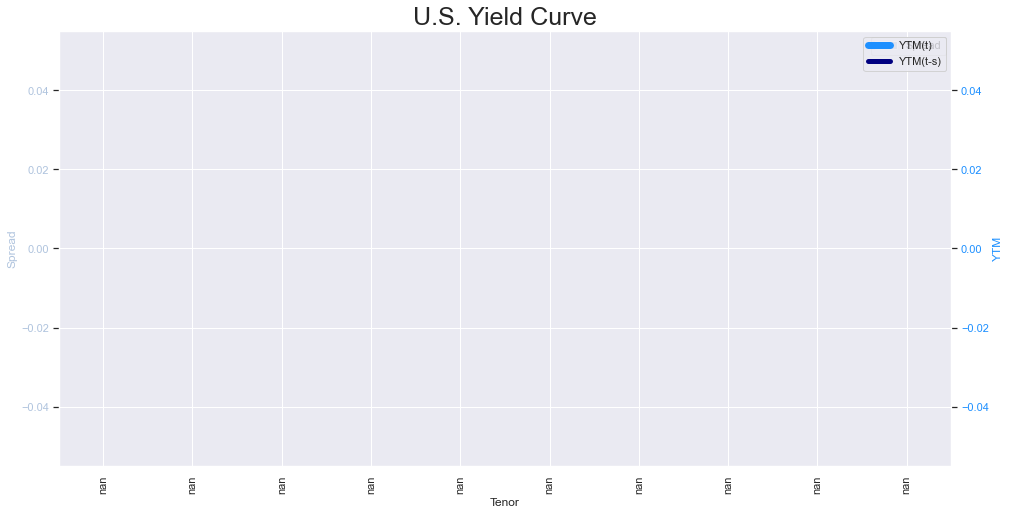

In [9]:
fig, ax1 = plt.subplots()
color = 'lightsteelblue'
ax1.set_ylabel('Spread', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)
#ax1.bar(df_final['Spread'], color="blue", height=5)
df_final.plot(figsize=(16,8),kind='bar', x='Tenor', y='Spread', color=color, linewidth= 1, ax=ax1)
#for i in ax1.patches:
  #ax1.text(i.get_x()+.12, i.get_height()-3, str(round((i.get_height())*100, 2)), fontsize=30, color='white')
#for i in range(len(df_final['Spread'])):
  #ax1.annotate(str(df_final['Spread']), xy=(i,df_final['Spread']))
#for a,b in zip(df_final['Tenor'], df_final['Spread']):
 #   ax1.text(a, b, str(b), fontsize=14, color='black', va='center', ha='left')
plt.title('U.S. Yield Curve', fontsize=25)
#for i,j in zip(df_final['Tenor'], str(df_final['Spread'])):
 # ax1.annotate(str(j),xy=(i,j))
ax2 = ax1.twinx()
color = 'dodgerblue'
ax2.set_xlabel('Tenor')
ax2.set_ylabel('YTM', color=color)
ax2.tick_params(axis='y', labelcolor=color )
ax2.tick_params(axis='x', labelcolor=color, rotation=90)
df_final.plot(figsize=(16,8),kind='line', x='Tenor', y='YTM(t)', color=color, linewidth=7, ax=ax2)
df_final.plot(figsize=(16,8),kind='line', x='Tenor', y='YTM(t-s)', color='navy', linewidth=5, ax=ax2);

##############################################################################################################################################################################################################

####SPREAD YTM10 PERU vs YTM10 USA

In [10]:
#USA
df_usa_ytm10=investpy.get_bond_historical_data(bond= 'U.S. 10Y', from_date='01/01/2020', to_date=hoy3)
df_usa_ytm10=df_usa_ytm10.assign(Variable=lambda x:  'U.S. 10Y', Type=lambda x: "bond") #Se añaden columnas Variable y Type
df_usa_ytm10.reset_index(inplace=True)
df_dateusa_ytm10 = df_date.join(df_usa_ytm10.set_index('Date'), on='Date')
df_dateusa_ytm10 = df_dateusa_ytm10.fillna(method='ffill')
df_dateusa_ytm10=df_dateusa_ytm10.set_index('Date')
print(df_dateusa_ytm10)

#Peru
df_peru_ytm10=investpy.get_bond_historical_data(bond= 'Peru 10Y', from_date=Inicio1, to_date=hoy3)
df_peru_ytm10=df_peru_ytm10.assign(Variable=lambda x:  'Peru 10Y', Type=lambda x: "bond") #Se añaden columnas Variable y Type
df_peru_ytm10.reset_index(inplace=True)
df_dateperu_ytm10 = df_date.join(df_peru_ytm10.set_index('Date'), on='Date')
df_dateperu_ytm10 = df_dateperu_ytm10.fillna(method='ffill')
df_dateperu_ytm10=df_dateperu_ytm10.set_index('Date')
print(df_dateperu_ytm10)

#Merge USA-Peru
df_merge_ytm10 = pd.merge(df_dateusa_ytm10, df_dateperu_ytm10, on='Date' )

#Spread
df_merge_ytm10 = df_merge_ytm10.rename(columns={"Open_x": "USA", "Open_y": "Peru"})
df_final_ytm10 = df_merge_ytm10[['USA', 'Peru']]
df_final_ytm10['Spread'] = df_final_ytm10.Peru - df_final_ytm10.USA
print(df_final_ytm10) 

             Open   High    Low  Close  Variable  Type
Date                                                  
2020-01-01  1.921  1.921  1.921  1.921  U.S. 10Y  bond
2020-01-02  1.919  1.946  1.851  1.877  U.S. 10Y  bond
2020-01-03  1.842  1.844  1.786  1.793  U.S. 10Y  bond
2020-01-04  1.842  1.844  1.786  1.793  U.S. 10Y  bond
2020-01-05  1.769  1.769  1.767  1.767  U.S. 10Y  bond
...           ...    ...    ...    ...       ...   ...
2020-08-30  0.724  0.724  0.724  0.724  U.S. 10Y  bond
2020-08-31  0.723  0.749  0.692  0.706  U.S. 10Y  bond
2020-09-01  0.713  0.731  0.669  0.672  U.S. 10Y  bond
2020-09-02  0.675  0.693  0.643  0.648  U.S. 10Y  bond
2020-09-03  0.646  0.664  0.615  0.620  U.S. 10Y  bond

[247 rows x 6 columns]
             Open   High    Low  Close  Variable  Type
Date                                                  
2020-01-01    NaN    NaN    NaN    NaN       NaN   NaN
2020-01-02  4.136  4.136  4.136  4.136  Peru 10Y  bond
2020-01-03  4.156  4.156  4.156  4.156  P

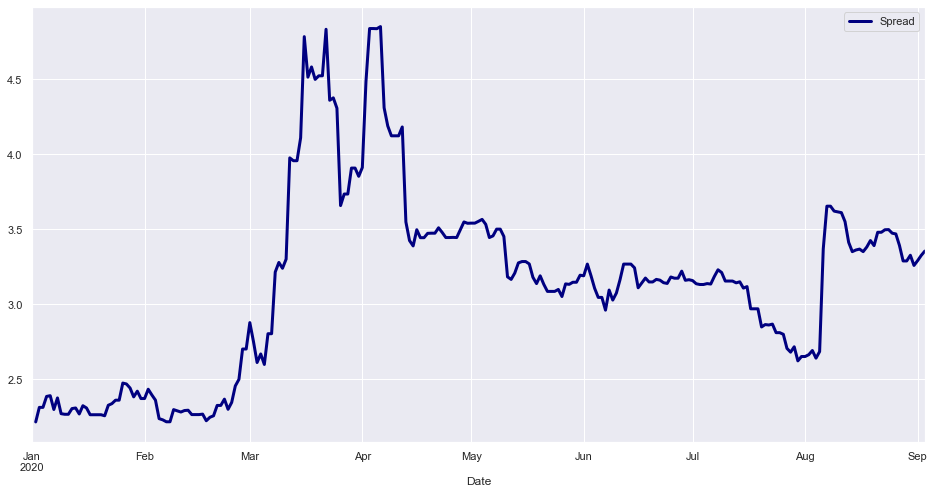

In [11]:
fig, ax = plt.subplots()
df_final_ytm10.plot(figsize=(16,8), kind='line', y='Spread', color='navy', linewidth= 3, ax=ax);

In [12]:
df_usa_junto_ytm10 = df_usa_junto_ytm10.rename(columns={"Open_x": "t_s", "Open_y": "t", "Variable_x": "Variable"})
df_finalusa_ytm10 = df_usa_junto_ytm10[['t_s', 't', 'Variable']]
df_finalusa_ytm10.reset_index(inplace=True)
df_finalusa_ytm10['Spread'] = df_finalusa_ytm10.t - df_finalusa_ytm10.t_s
df_finalusa_ytm10 = df_finalusa_ytm10.rename(columns={"t_s": "YTM(t-s)", "t": "YTM(t)", "Variable": "Tenor"})
df_finalusa_ytm10

NameError: name 'df_usa_junto_ytm10' is not defined

#PRUEBAS (Ignorar)

In [ ]:
#DÍA DE HOY
df_hoy_usa=df_usa_bond.loc[df_usa_bond['Date'] == hoy3]
df_hoy_usa=df_hoy_usa.set_index('Variable')
df_hoy_usa

In [ ]:
from datetime import timedelta
past_week = datetime.datetime.today() - timedelta(days=7)
past_week =str(past_week.strftime('%d/%m/%Y'))
past_week

In [ ]:
#SEMANA PASADA
df_pastweek_usa=df_usa_bond.loc[df_usa_bond['Date'] == past_week]
df_pastweek_usa=df_pastweek_usa.set_index('Variable')
df_pastweek_usa

In [ ]:
#RESTA HOY Y HACE UNA SEMANA
df_resta = df_pastweek_usa[[ ]]
df_resta['Resta'] = df_hoy_usa.Open - df_pastweek_usa.Open
df_resta

In [ ]:
fig, ax = plt.subplots()
df_hoy_usa.plot(figsize=(25,10),kind='line', y='Open', color='skyblue', linewidth= 5, ax=ax)

df_resta.plot(figsize=(25,10),kind='bar',  y='Resta', color='gray', linewidth= 0.1, ax=ax)
#for p in ax.patches:
 #   ax.annotate(p.get_height(), (p.get_x(), p.get_height()), fontsize=14, color='white')
for i in ax.patches:
  ax.text(i.get_x(), i.get_height(),i.get_height()), fontsize=22, color='white')


In [ ]:
fig, ax = plt.subplots()
df_hoy_usa.plot(figsize=(25,10),kind='line', y='Open', color='skyblue', linewidth= 5, ax=ax)
df_resta.plot(figsize=(25,10),kind='bar',  y='Resta', color='gray', linewidth= 0.1, ax=ax)
for k, v in df_resta.iterrows():
  ax.annotate(k, v, xytext=(10,-5), textcoords='offset points', family='sans-serif', fontsize=18, color='darkslategrey')

In [ ]:
df_usa_bond.isnull().sum().sum()

####PRUEBA DE SOLO 1 BONO


In [ ]:
df_usa30Y=investpy.get_bond_historical_data(bond= "U.S. 30Y", from_date='01/01/2020', to_date=hoy3)
df_usa30Y.reset_index(inplace=True)
df_date = df_date.join(df_usa30Y.set_index('Date'), on='Date')
df_date = df_date.fillna(method='ffill') 
print(df_date)

In [ ]:
df_date